## How to use this notebook
1. Simpan notebook ini dalam folder yang sama dengan data yang digunakan. Jika tidak sama, maka ada variabel `path` dibawah harus disesuaikan nilainya.
2. Notebook ini akan membaca semua file yg berformat `csv` lalu menggabungkannya kedalam satu variabel.
3. Notebook ini menggunakan library: `Pandas` untuk membaca data; `glob` untuk membaca banyak file; `pandas_profiling` untuk membuat report analisa data.

## Read multiple files and concatenate into one dataframe
ref: https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

In [3]:
import pandas as pd

# Check if all the data have the same columns
df = pd.read_csv("2012-01-01.csv")
df2 = pd.read_csv("2012-01-10.csv")

display(df.head(), df2.head())

,date,cell_ll_lat,cell_ll_lon,flag,geartype,hours,fishing_hours,mmsi_present
0,2012-01-01,22.64,-17.50,NaN,fishing,1.6113,0.0,1
1,2012-01-01,22.94,-17.44,NaN,fishing,0.0716,0.0,1
2,2012-01-01,19.20,-17.88,NaN,fishing,0.0275,0.0,1
3,2012-01-01,22.63,-17.51,NaN,fishing,0.0166,0.0,1
4,2012-01-01,22.62,-17.51,NaN,fishing,0.0366,0.0,1


,date,cell_ll_lat,cell_ll_lon,flag,geartype,hours,fishing_hours,mmsi_present
0,2012-01-10,9.50,-14.27,NaN,fishing,0.1741,0.0,1
1,2012-01-10,54.50,-165.51,NaN,fixed_gear,18.3216,0.0,1
2,2012-01-10,10.25,-15.74,NaN,fishing,3.6308,0.0,1
3,2012-01-10,9.52,-14.34,NaN,fishing,0.0500,0.0,1
4,2012-01-10,9.52,-14.35,NaN,fishing,0.0333,0.0,1


Uncomment script dibawah untuk menginstall `glob` module.

In [ ]:
# !pip install glob

In [4]:
# The script below concatenate many files into one with assumption all the files have same columns
import glob
import os

# get current working directory path
path = os.getcwd()

path

'C:\\Users\\titan\\Documents\\Lain-Lain\\Data fishwatch'

In [5]:
# get all filenames with format .csv in the defined path, and concatenate into one list
all_files = glob.glob(path + "\\*.csv")

all_files

['C:\\Users\\titan\\Documents\\Lain-Lain\\Data fishwatch\\2012-01-01.csv',
 'C:\\Users\\titan\\Documents\\Lain-Lain\\Data fishwatch\\2012-01-02.csv',
 'C:\\Users\\titan\\Documents\\Lain-Lain\\Data fishwatch\\2012-01-03.csv',
 'C:\\Users\\titan\\Documents\\Lain-Lain\\Data fishwatch\\2012-01-04.csv',
 'C:\\Users\\titan\\Documents\\Lain-Lain\\Data fishwatch\\2012-01-05.csv',
 'C:\\Users\\titan\\Documents\\Lain-Lain\\Data fishwatch\\2012-01-06.csv',
 'C:\\Users\\titan\\Documents\\Lain-Lain\\Data fishwatch\\2012-01-07.csv',
 'C:\\Users\\titan\\Documents\\Lain-Lain\\Data fishwatch\\2012-01-08.csv',
 'C:\\Users\\titan\\Documents\\Lain-Lain\\Data fishwatch\\2012-01-09.csv',
 'C:\\Users\\titan\\Documents\\Lain-Lain\\Data fishwatch\\2012-01-10.csv']

In [6]:
# Create empty list for working in the for loop
list_df = []

# for loop for read all the files and concatetinate into one list
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    list_df.append(df)
    
# Concatetinate all data in list_df into one dataframe
all_df = pd.concat(list_df, axis=0, ignore_index=True)

all_df.head()

,date,cell_ll_lat,cell_ll_lon,flag,geartype,hours,fishing_hours,mmsi_present
0,2012-01-01,22.64,-17.50,NaN,fishing,1.6113,0.0,1
1,2012-01-01,22.94,-17.44,NaN,fishing,0.0716,0.0,1
2,2012-01-01,19.20,-17.88,NaN,fishing,0.0275,0.0,1
3,2012-01-01,22.63,-17.51,NaN,fishing,0.0166,0.0,1
4,2012-01-01,22.62,-17.51,NaN,fishing,0.0366,0.0,1


## Data exploration
Instead of using `describe` methode, I use `pandas_profiling` module to get comprehensive data report.
Ref: https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/getting_started.html

In [7]:
all_df.describe()

,cell_ll_lat,cell_ll_lon,hours,fishing_hours,mmsi_present
count,137219.000000,137219.000000,137219.000000,137219.000000,137219.000000
mean,10.415856,-14.266874,1.798329,0.058806,1.036810
std,30.407279,114.790000,7.057826,0.648167,0.324253
min,-65.480000,-180.000000,0.000000,0.000000,1.000000
25%,-8.570000,-126.230000,0.052500,0.000000,1.000000
50%,0.710000,-6.080000,0.211900,0.000000,1.000000
75%,43.320000,63.290000,1.599700,0.000000,1.000000
max,81.580000,179.990000,530.599400,28.968000,21.000000


Uncomment script dibawah untuk menginstall `pandas profiling` module.

In [21]:
# Install Pandas Profiling module
# import sys
# !{sys.executable} -m pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

'Install Pandas Profiling module\nimport sys\n!{sys.executable} -m pip install -U pandas-profiling[notebook]\n!jupyter nbextension enable --py widgetsnbextension\n'

In [8]:
# Pandas Profiling Report
from pandas_profiling import ProfileReport

profile = ProfileReport(all_df, title="Pandas Profiling Report", explorative=True)

In [9]:
profile

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
#profile.to_widgets()

In [11]:
#profile.to_notebook_iframe()

In [27]:
# Save to html
profile.to_file("Report_data.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Visualization

In [48]:
# filter data and fit into Indonesia
all_df_id = all_df[(all_df['cell_ll_lon'] > 85) & (all_df['cell_ll_lon'] < 150)
          & (all_df['cell_ll_lat'] > -11) & (all_df['cell_ll_lat'] < 11)]

all_df_id.shape

(3998, 8)

In [49]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import cartopy
import cartopy.crs as ccrs
import cmocean
import cartopy.mpl.ticker as cticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
matplotlib.rc('font', size=16)
matplotlib.rc('font', weight='bold')
matplotlib.rc('axes', labelweight='bold')

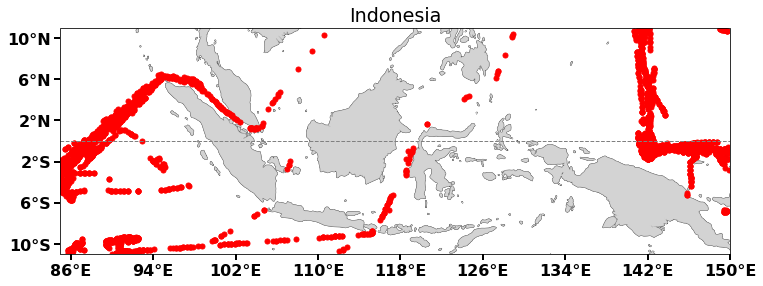

In [51]:
# set ukuran plot
plt.figure(figsize=(12,6))

# set proyeksi map
ax = plt.axes(projection=ccrs.PlateCarree())

# set domain map
ax.set_extent([85, 150, -11, 11], ccrs.PlateCarree())

# mengatur komponen yang ada di map: garis pantai, warna laut, warna daratan
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.OCEAN, color='white', zorder=0)
ax.add_feature(cartopy.feature.LAND, color='lightgray',zorder=1, 
                   linewidth=0.5, edgecolor='black')

# menentukkan letak ticks di sb-x dan -y
ax.set_xticks([86, 94, 102, 110, 118, 126, 134, 142, 150], crs=ccrs.PlateCarree())
ax.set_yticks([-10, -6, -2, 2, 6, 10], crs=ccrs.PlateCarree())


# Mengatur penulisan koordinat longitude dan latitude di plot
lon_formatter = LongitudeFormatter(number_format='.0f',
                                   dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# mengatur tick plot
ax.tick_params(direction='out', length=6, width=2, colors='black',
           grid_color='black', grid_alpha=0.5)

# Judul plot
plt.title('Indonesia')

# Plot data kapal
plt.plot(all_df_id['cell_ll_lon'], all_df_id['cell_ll_lat'], markersize=5,marker='o',linestyle='',color='red',transform=ccrs.PlateCarree())
plt.plot(np.array([85, 150]), np.array([0, 0]), linestyle='--', linewidth=1, color='gray')  # menambahkan garis di ekuator

# Save gambar
plt.savefig('hasil_peta.png', bbox_inches='tight', dpi=400) 
plt.show()